# Jupyter notebook 3/3

In [1]:
#Walk forward in test data

In [2]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pandas import Series
from statsmodels.tsa.arima_model import ARMA

import numpy as np
import scipy.stats as scs
import statsmodels.tsa.api as smt

from statsmodels.tsa.stattools import arma_order_select_ic

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.tsatools import detrend
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
from math import sqrt
from statsmodels.tsa.ar_model import AR 

from matplotlib import pyplot
import matplotlib as mpl
import pylab
from pandas import DataFrame, concat
from pandas import TimeGrouper


import warnings
warnings.filterwarnings("ignore")

In [3]:
series = Series.from_csv('Stationary3.csv',header=0)
s=series.dropna()


In [4]:
s.to_csv('finalstationary.csv')

In [5]:
series=s
series

Date
1921-01-01   -1.392103
1921-02-01   -1.494680
1921-03-01   -1.293204
1921-04-01   -0.338961
1921-05-01   -0.061502
1921-06-01   -0.277062
1921-07-01   -0.331201
1921-08-01   -0.527297
1921-09-01   -0.377867
1921-10-01   -0.365596
1921-11-01    0.444019
1921-12-01    0.806174
1922-01-01    0.524455
1922-02-01   -0.288625
1922-03-01   -0.279312
1922-04-01    0.982395
1922-05-01    1.328310
1922-06-01    1.359495
1922-07-01    1.197489
1922-08-01    1.128744
1922-09-01    1.395301
1922-10-01    1.282830
1922-11-01    1.005124
1922-12-01    0.778735
1923-01-01    0.917815
1923-02-01    0.017717
1923-03-01   -0.169683
1923-04-01    0.159940
1923-05-01    0.261806
1923-06-01    0.301309
                ...   
1963-07-01   -0.768045
1963-08-01   -0.662620
1963-09-01   -0.505824
1963-10-01   -0.365346
1963-11-01   -0.224067
1963-12-01   -0.304934
1964-01-01   -0.420493
1964-02-01   -0.533994
1964-03-01   -0.492035
1964-04-01   -0.132830
1964-05-01   -0.155366
1964-06-01   -0.620615
1964-0

In [6]:
print(series.describe())

count    5.400000e+02
mean    -8.851167e-08
std      1.183744e+00
min     -2.911768e+00
25%     -7.963064e-01
50%      2.189220e-03
75%      7.736592e-01
max      4.012979e+00
Name: Level, dtype: float64


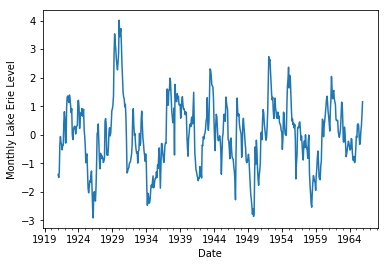

In [7]:
pyplot.figure(1)
series.plot()
pylab.ylabel('Monthly Lake Erie Level')
pylab.xlabel('Date')
pyplot.show()


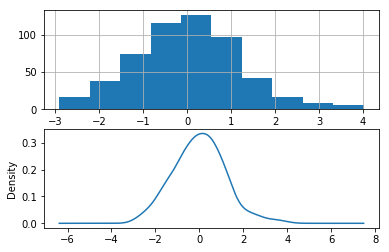

In [8]:
pyplot.figure(3)
pyplot.subplot(211)
series.hist()
pyplot.subplot(212) 
series.plot(kind='kde')
pyplot.show(3)

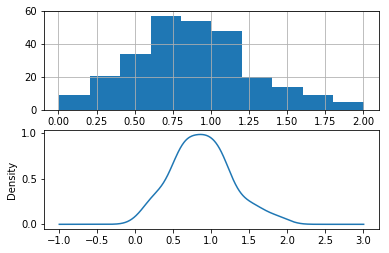

In [9]:
series1=np.sqrt(series)
pyplot.figure(3)
pyplot.subplot(211)
series1.hist()
pyplot.subplot(212) 
series1.plot(kind='kde')
pyplot.show(3)

In [10]:
split_point = int(round(len(series)*0.95))
train, holdontest = series[0:split_point], series[split_point:]
print('Train %d, holdonTest %d' % (len(train), len(holdontest)))
train.to_csv('trainSet.csv')
holdontest.to_csv('holdontestSet.csv')


Train 513, holdonTest 27


In [11]:
X = series.values

In [12]:
X = X.astype('float32')

In [13]:
train_size = int(len(X) * 0.95)
train, test = X[0:train_size], X[train_size:]
# check if stationary
result = adfuller(train)
print('ADF Statistic: %f' % result[0]) 
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value)) 


ADF Statistic: -4.667281
p-value: 0.000097
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


In [14]:
#From previous notebook its clear that ARMA(2,0) is best fit

In [15]:
model = ARMA(X, order=(2, 0))
results = model.fit(trend='c', method='css-mle')
print(results.summary())
RSS= np.sum((results.resid)**2)
print(RSS)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  540
Model:                     ARMA(2, 0)   Log Likelihood                -311.859
Method:                       css-mle   S.D. of innovations              0.430
Date:                Mon, 03 Dec 2018   AIC                            631.718
Time:                        14:11:57   BIC                            648.885
Sample:                             0   HQIC                           638.432
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0008      0.209     -0.004      0.997      -0.410       0.408
ar.L1.y        1.1300      0.042     26.918      0.000       1.048       1.212
ar.L2.y       -0.2175      0.042     -5.172      0.0

In [16]:
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.95)
train, test = X[0:train_size], X[train_size:]

# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	model = ARMA(history, order=(2,0)) #using manually selected paratments
	model_fit = model.fit(trend='nc', method='css-mle')
	yhat = model_fit.forecast()[0]
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
print(model_fit.summary())

RMSE: 0.242
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  539
Model:                     ARMA(2, 0)   Log Likelihood                -311.237
Method:                       css-mle   S.D. of innovations              0.430
Date:                Mon, 03 Dec 2018   AIC                            628.473
Time:                        14:11:59   BIC                            641.342
Sample:                             0   HQIC                           633.507
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        1.1283      0.042     26.859      0.000       1.046       1.211
ar.L2.y       -0.2161      0.042     -5.137      0.000      -0.299      -0.134
                                    Root

In [17]:
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))

predicted=-0.428315, expected=-0.365346
predicted=-0.303531, expected=-0.224067
predicted=-0.174382, expected=-0.304934
predicted=-0.295552, expected=-0.420493
predicted=-0.408445, expected=-0.533994
predicted=-0.511656, expected=-0.492035
predicted=-0.440207, expected=-0.132830
predicted=-0.044568, expected=-0.155366
predicted=-0.146600, expected=-0.620615
predicted=-0.665608, expected=-0.865072
predicted=-0.841990, expected=-0.904693
predicted=-0.834414, expected=-0.760257
predicted=-0.663096, expected=-0.974049
predicted=-0.935139, expected=-0.848635
predicted=-0.748150, expected=-0.510565
predicted=-0.393802, expected=-0.056761
predicted=0.045744, expected=-0.097535
predicted=-0.097745, expected=0.355771
predicted=0.421728, expected=0.385429
predicted=0.358057, expected=0.335020
predicted=0.294920, expected=-0.045938
predicted=-0.123534, expected=-0.338686
predicted=-0.371934, expected=-0.256243
predicted=-0.216059, expected=0.123231
predicted=0.194016, expected=0.312832
predicted=

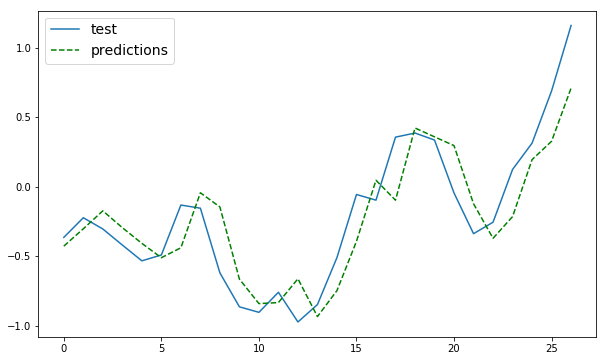

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(test,label='test')
plt.plot(predictions, color='green',linestyle='--',label='predictions')
plt.legend(fontsize=14)
plt.show()

In [19]:
#Walk forward over time steps in test

predicted=0.740812, expected=1.159428
Lag: 2
RMSE: 0.241


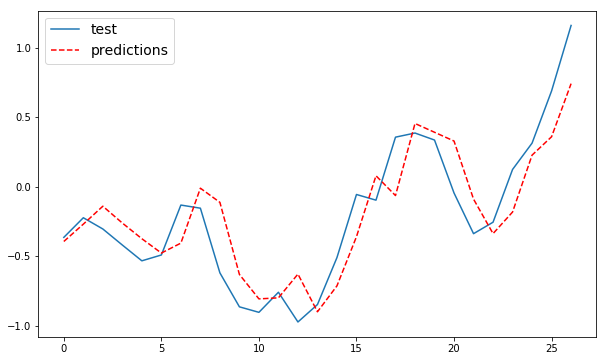

In [20]:
X = series.values
train_size = int(len(X) * 0.95)
train, test = X[0:train_size], X[train_size:]
# train autoregression
model = ARIMA(train, order=(2,0,0))
model_fit = model.fit(disp=False, trend='c',transparams=False)
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions1 = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions1.append(yhat)
	history.append(obs)
print('predicted=%f, expected=%f' % (yhat, obs))
print('Lag: %s' % model_fit.k_ar)
# report performance
rmse = sqrt(mean_squared_error(test, predictions1))
print('RMSE: %.3f' % rmse)

# plot
plt.figure(figsize=(10,6))
plt.plot(test,label='test')
plt.plot(predictions1, color='red',linestyle='--',label='predictions')
plt.legend(fontsize=14)
plt.show()

In [21]:
for i in range(len(predictions1)):
	print('predicted=%f, expected=%f' % (predictions1[i], test[i]))

predicted=-0.394778, expected=-0.365346
predicted=-0.270145, expected=-0.224067
predicted=-0.141134, expected=-0.304934
predicted=-0.262228, expected=-0.420493
predicted=-0.375007, expected=-0.533994
predicted=-0.478078, expected=-0.492035
predicted=-0.406679, expected=-0.132830
predicted=-0.011481, expected=-0.155366
predicted=-0.113396, expected=-0.620615
predicted=-0.632042, expected=-0.865072
predicted=-0.807919, expected=-0.904693
predicted=-0.800394, expected=-0.760257
predicted=-0.629445, expected=-0.974049
predicted=-0.900766, expected=-0.848635
predicted=-0.714097, expected=-0.510565
predicted=-0.360466, expected=-0.056761
predicted=0.078053, expected=-0.097535
predicted=-0.064543, expected=0.355771
predicted=0.454161, expected=0.385429
predicted=0.390913, expected=0.335020
predicted=0.327878, expected=-0.045938
predicted=-0.089993, expected=-0.338686
predicted=-0.338168, expected=-0.256243
predicted=-0.183017, expected=0.123231
predicted=0.226356, expected=0.312832
predicted=

In [22]:
import numpy as np
Pred1 = np.asarray(predictions1)


In [23]:
import pandas as pd 
Pred1 = pd.DataFrame(Pred1)
Pred1.to_csv("Pred1.csv")

In [24]:
Pred = np.asarray(predictions)
Pred = pd.DataFrame(Pred)
Pred.to_csv("Pred.csv")